<h2 style="color:green" align="center">Predicting if a transaction is fraud based on the transaction id provided by the bank</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if a transaction is fraud or not).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Labelled data is provided where transactio id and fraud status is already mentioned by the bank**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_ML/CODE BASICS/ML/7_logistic_reg/Transactio data1.csv")
df

,Transaction_id,Fraud_Transactions_status,Transaction_Date,Valu_ Date,Particulars,Cheque No,Debit,Credit,Balance
0,22,0,2-Aug-22,2-Aug-22,UPI/MOB/221456965314/,NaN,15,NaN,102000
1,25,0,2-Aug-22,2-Aug-22,UPI/MOB/221456965314/,NaN,116,NaN,101884
2,47,1,2-Aug-22,2-Aug-22,UPI/MOB/221456965314/,NaN,20000,NaN,81884
3,52,0,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,35,NaN,81849
4,46,1,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,15000,NaN,66849
5,56,1,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,15000,NaN,51849
6,55,0,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,NaN,"5,000.00",56849
7,60,1,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,"5,000.00",NaN,51849
8,62,1,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,860,NaN,50989
9,61,1,3-Aug-22,3-Aug-22,UPI/MOB/221456965314/,NaN,2100,NaN,48889


**Scatter plot: It shows sigmoid curve/ S- curve**

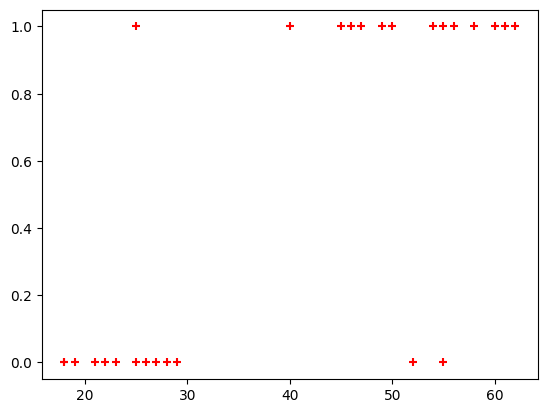

In [ ]:
plt.scatter(df.Transaction_id,df.Fraud_Transactions_status,marker='+',color='red')

**Model selection

```
# Splitting the data in training and testing
```

**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Transaction_id']],df.Fraud_Transactions_status,train_size=0.8)

In [ ]:
X_test

,Transaction_id
21,26
6,55
13,29
14,49
23,45
3,52


**Logistic Regression model: as data/Scatter plot shows S- curve(sigmoid curve)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test

,Transaction_id
21,26
6,55
13,29
14,49
23,45
3,52


In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array([0, 1, 0, 1, 1, 1])

In [ ]:
model.score(X_test,y_test)

0.6666666666666666

Note: Model score is 67% which is good.

**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.33215704]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-10.12121894])

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.33215704 * Transaction_id -10.12121894
    y = sigmoid(z)
    return y

In [ ]:
Transaction_id = 52
prediction_function(Transaction_id)

0.9992164933070219

**IF the value is more than 0.5 then Transaction is fraud else no fruad**